In [1]:
import pykat

import pykat
print('Loading Pykat from: '+pykat.__file__)
print('Pykat version: '+pykat.__version__)
print('Using finesse from: '+str(pykat.kat._finesse_exec()))
print('Finesse version: '+str(pykat.v))

from pykat import finesse
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

                                              ..-
    PyKat 1.1.322         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat

Loading Pykat from: /Users/ajones/git/pykat/pykat/__init__.py
Pykat version: 1.1.322
Using finesse from: /Users/ajones/anaconda3/bin/kat
Finesse version: 2.2-11-ga945eda


## Quick Check that xbeta excites first order mode
Quick check that changing xbeta on a bs before a cavity excited the first order mode.

--------------------------------------------------------------
Running kat - Started at 2019-08-30 11:40:18.663271
Used Finesse 2.2 at /Users/ajones/anaconda3/bin/kat

Finished in 0.079458 seconds


100% | ETA:  0:00:00 | Saving data                                             

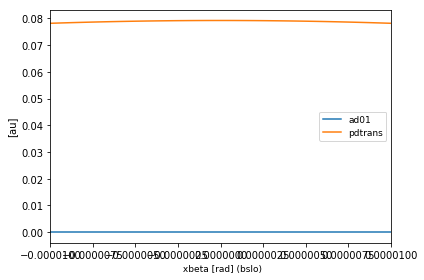

In [28]:
# Finesse Solution
base = finesse.kat()
#with open()
base.parse(f"""
l LO 1 0 n0
s sin 1 n0 nbslo
bs bslo 1 0 0 45 nbslo nbsrefl dump dump 
s s1 1 nbsrefl nitm1
m itm1 0.99 0.01 0 nitm1 nitm2
s scav 1 nitm2 netm1
m etm1 0.99 0.01 0 netm1 netm2
ad ad01 0 1 0 nitm1
pd pdtrans netm2

xaxis bslo xbeta lin -10u +10u 100
maxtem 3
""")

out = base.run()
out.plot()

## Check the response of the the photodiodes to xbeta modulation

In [15]:
# Finesse Solution
bhd = finesse.kat()
bhd.load('finesse_BHD_beam_jitter.kat')

Parsing `set A1_I pdA1_I re` into pykat object not implemented yet, added as extra line.
Parsing `set A2_I pdA2_I re` into pykat object not implemented yet, added as extra line.
Parsing `set B1_I pdB1_I re` into pykat object not implemented yet, added as extra line.
Parsing `set B2_I pdB2_I re` into pykat object not implemented yet, added as extra line.
Parsing `set A1_Q pdA1_Q re` into pykat object not implemented yet, added as extra line.
Parsing `set A2_Q pdA2_Q re` into pykat object not implemented yet, added as extra line.
Parsing `set B1_Q pdB1_Q re` into pykat object not implemented yet, added as extra line.
Parsing `set B2_Q pdB2_Q re` into pykat object not implemented yet, added as extra line.


In [47]:
bhd2 = deepcopy(bhd)
bhd2.parse("""
attr SM1 xbeta -1u
fsig sig1 SM1 xbeta 1 0
xaxis sig1 f log 1 5k 100
maxtem 1
yaxis re:im
""")
bhd2.AS.P = 1e-3
bhd2.LO.P = 100e-3

# 0 = Amplitude Quad
# 45 = Phase Quad
bhd2.BShomodyne.phi = np.sqrt(2)*0

out = bhd2.run()
#print(out.stdout)

--------------------------------------------------------------
Running kat - Started at 2019-08-30 12:08:43.002504


 63% | ETA:  0:00:00 | Calculating                                             

Used Finesse 2.2 at /Users/ajones/anaconda3/bin/kat

Finished in 4.56146 seconds


100% | ETA:  0:00:00 | Saving data                                             

Text(0, 0.5, 'Phase [pi]')

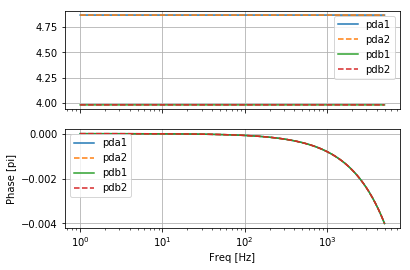

In [48]:
fig, ax = plt.subplots(nrows=2,sharex=True)
#ax = [ax]
ax[0].semilogx(out.x,np.abs(out['pdA1_I']),label='pda1')
ax[0].semilogx(out.x,np.abs(out['pdA2_I']),'--',label='pda2')
ax[0].semilogx(out.x,np.abs(out['pdB1_I']),label='pdb1')
ax[0].semilogx(out.x,np.abs(out['pdB2_I']),'--',label='pdb2')
ax[1].semilogx(out.x,np.angle(out['pdA1_I'])/np.pi,label='pda1')
ax[1].semilogx(out.x,np.angle(out['pdA2_I'])/np.pi,'--',label='pda2')
ax[1].semilogx(out.x,np.angle(out['pdB1_I'])/np.pi,label='pdb1')
ax[1].semilogx(out.x,np.angle(out['pdB2_I'])/np.pi,'--',label='pdb2')
for a in ax:
    a.legend()
    a.grid()
ax[1].set_xlabel('Freq [Hz]')
ax[1].set_ylabel('Phase [pi]')

## Plot the transfer function of the xbeta into the gwchannel for several misalignments

In [54]:
bhd2 = deepcopy(bhd)
bhd2.parse("""
fsig sig1 SM1 xbeta 1 0
xaxis sig1 f log 1 5k 100
maxtem 1
yaxis re:im
""")
bhd2.AS.P = 1e-3
bhd2.LO.P = 100e-3

# 0 = Amplitude Quad
# 45 = Phase Quad
bhd2.BShomodyne.phi = np.sqrt(2)*0
outs = {}

for u in ["1u","0.1u","10u"]:

    bhd3 = deepcopy(bhd2)
    bhd3.parse(f"attr SM1 xbeta {u}")
    outs[u]= bhd3.run()

--------------------------------------------------------------
Running kat - Started at 2019-08-30 13:29:07.174157


100% | ETA:  0:00:00 | Saving data                                             

Used Finesse 2.2 at /Users/ajones/anaconda3/bin/kat

Finished in 4.30892 seconds
--------------------------------------------------------------
Running kat - Started at 2019-08-30 13:29:11.551966


100% | ETA:  0:00:00 | Saving data                                             

Used Finesse 2.2 at /Users/ajones/anaconda3/bin/kat

Finished in 3.93106 seconds
--------------------------------------------------------------
Running kat - Started at 2019-08-30 13:29:15.553040


 63% | ETA:  0:00:00 | Calculating                                             

Used Finesse 2.2 at /Users/ajones/anaconda3/bin/kat

Finished in 3.96414 seconds


100% | ETA:  0:00:00 | Saving data                                             

gwchan abs for 1u misalignment at SM1: 1.7847097009071897
gwchan abs for 0.1u misalignment at SM1: 0.17847925847348234
gwchan abs for 10u misalignment at SM1: 17.76440727972743


Text(0.5, 0, 'Freq [Hz]')

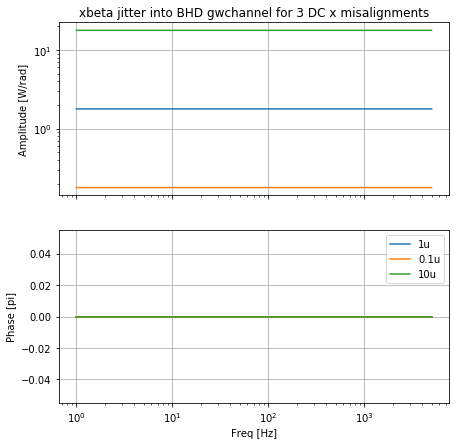

In [65]:
fig, ax = plt.subplots(nrows=2,sharex=True,figsize=(7,7))

for k,v in outs.items():
    gwchan_abs = np.abs((v['pdA1_I']+v['pdA2_I'])
                    - (v['pdB1_I']+v['pdB2_I']))
    gwchan_phase = np.angle((v['pdA1_Q']+v['pdA2_Q'])
                        - (v['pdB1_Q']+v['pdB2_Q']))
    print(f'gwchan abs for {k} misalignment at SM1: {np.average(gwchan_abs)}')
    ax[0].loglog(v.x,gwchan_abs,label=k)
    ax[1].semilogx(v.x,gwchan_phase/np.pi,label=k)

ax[0].set_title('xbeta jitter into BHD gwchannel for 3 DC x misalignments')
ax[0].set_ylabel('Amplitude [W/rad]')
ax[1].set_ylabel('Phase [pi]')
for a in ax:
    a.grid()
ax[1].legend()
ax[1].set_xlabel('Freq [Hz]')

In [66]:
for u in ["1u","0.1u","10u"]:

    bhd3 = deepcopy(bhd2)
    bhd3.parse(f"attr SM1 ybeta {u}")
    outs[u]= bhd3.run()

--------------------------------------------------------------
Running kat - Started at 2019-08-30 13:38:00.947022


100% | ETA:  0:00:00 | Saving data                                             

Used Finesse 2.2 at /Users/ajones/anaconda3/bin/kat

Finished in 4.4554 seconds
--------------------------------------------------------------
Running kat - Started at 2019-08-30 13:38:05.485957


100% | ETA:  0:00:00 | Saving data                                             

Used Finesse 2.2 at /Users/ajones/anaconda3/bin/kat

Finished in 4.27668 seconds
--------------------------------------------------------------
Running kat - Started at 2019-08-30 13:38:09.837759


 63% | ETA:  0:00:00 | Calculating                                             

Used Finesse 2.2 at /Users/ajones/anaconda3/bin/kat

Finished in 4.09116 seconds


100% | ETA:  0:00:00 | Saving data                                             

gwchan abs for 1u misalignment at SM1: 0.0
gwchan abs for 0.1u misalignment at SM1: 0.0
gwchan abs for 10u misalignment at SM1: 0.0


Text(0.5, 0, 'Freq [Hz]')

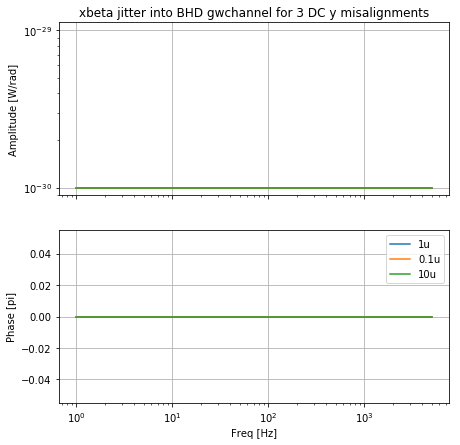

In [69]:
fig, ax = plt.subplots(nrows=2,sharex=True,figsize=(7,7))

for k,v in outs.items():
    gwchan_abs = np.abs((v['pdA1_I']+v['pdA2_I'])
                    - (v['pdB1_I']+v['pdB2_I']))
    gwchan_phase = np.angle((v['pdA1_Q']+v['pdA2_Q'])
                        - (v['pdB1_Q']+v['pdB2_Q']))
    print(f'gwchan abs for {k} misalignment at SM1: {np.average(gwchan_abs)}')
    ax[0].loglog(v.x,gwchan_abs+1e-30,label=k)
    ax[1].semilogx(v.x,gwchan_phase/np.pi,label=k)

ax[0].set_title('xbeta jitter into BHD gwchannel for 3 DC y misalignments')
ax[0].set_ylabel('Amplitude [W/rad]')
ax[1].set_ylabel('Phase [pi]')
for a in ax:
    a.grid()
ax[1].legend()
ax[1].set_xlabel('Freq [Hz]')